Loading Dataset

In [1]:
import pandas as pd

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Preview datasets
print("Customers Dataset:\n", customers.head())
print("\nProducts Dataset:\n", products.head())
print("\nTransactions Dataset:\n", transactions.head())


Customers Dataset:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166

Inspect Data

In [2]:
# Check for missing values
print("Missing values in Customers:\n", customers.isnull().sum())
print("\nMissing values in Products:\n", products.isnull().sum())
print("\nMissing values in Transactions:\n", transactions.isnull().sum())

# Check data types and basic statistics
print("\nCustomers Info:")
print(customers.info())
print("\nProducts Info:")
print(products.info())
print("\nTransactions Info:")
print(transactions.info())

# Check for duplicates
print("\nDuplicates in Transactions:", transactions.duplicated().sum())


Missing values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
-

Merge for EDA :
Transactions + Products (via ProductID)
Transactions + Customers (via CustomerID)

In [3]:
# Merge Transactions with Products
transactions_products = transactions.merge(products, on="ProductID", how="left")

# Merge the above result with Customers
full_data = transactions_products.merge(customers, on="CustomerID", how="left")

# Preview the merged dataset
print("Merged Dataset:\n", full_data.head())


Merged Dataset:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x                      ProductName     Category  Price_y  \
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
2      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
3      601.36   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
4      902.04   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   

      CustomerName         Region  SignupDate  
0   Andrea Jenkins   

EDA Univariate

1.Region Distribution

2.Product category distribution

3.Distribution of product prices

4.Signup dates



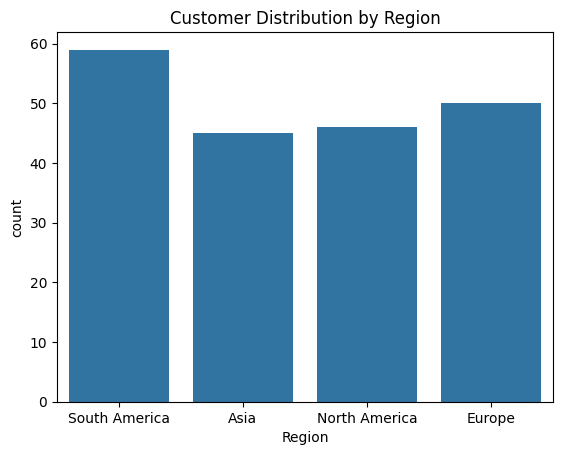

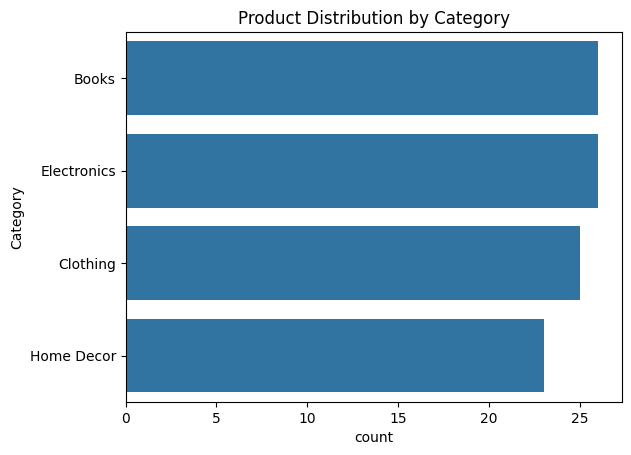

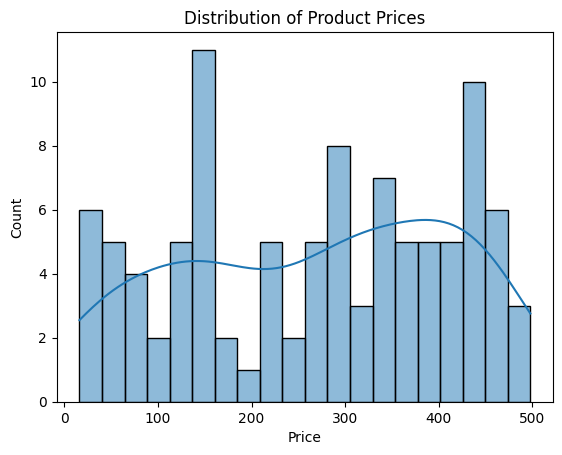

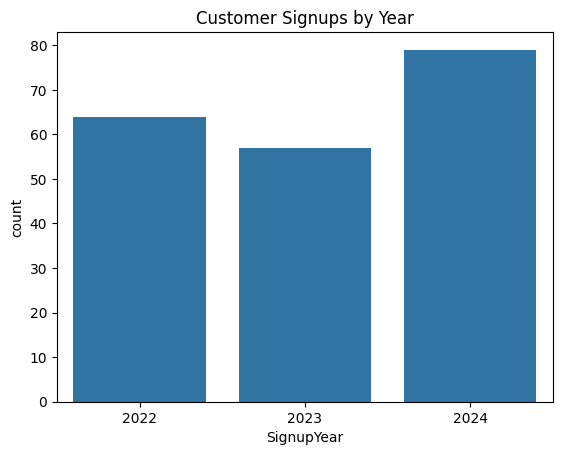

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Region distribution
sns.countplot(data=customers, x="Region")
plt.title("Customer Distribution by Region")
plt.show()

# Product category distribution
sns.countplot(data=products, y="Category", order=products['Category'].value_counts().index)
plt.title("Product Distribution by Category")
plt.show()

# Distribution of product prices
sns.histplot(products['Price'], bins=20, kde=True)
plt.title("Distribution of Product Prices")
plt.show()

# Signup dates
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year
sns.countplot(data=customers, x="SignupYear")
plt.title("Customer Signups by Year")
plt.show()


EDA Bivariate
1. Sales x Region
2. Sales x Product
3.Sales x Months

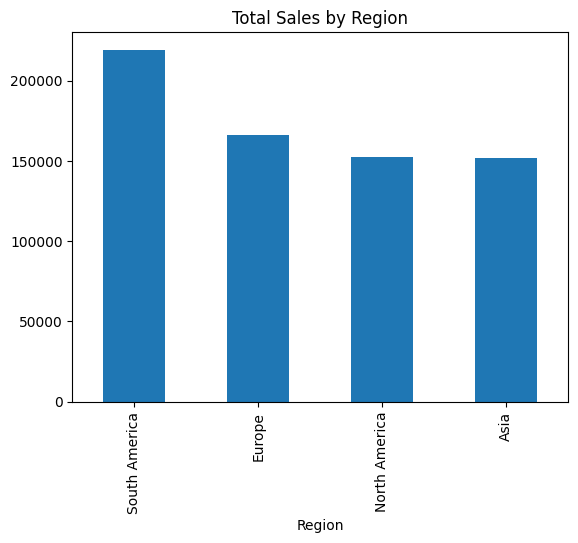

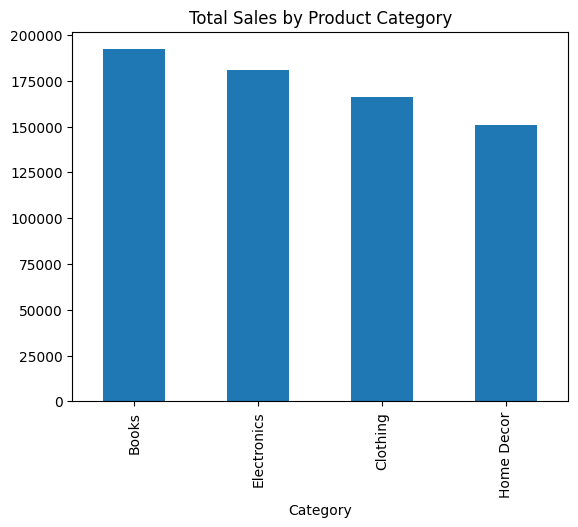

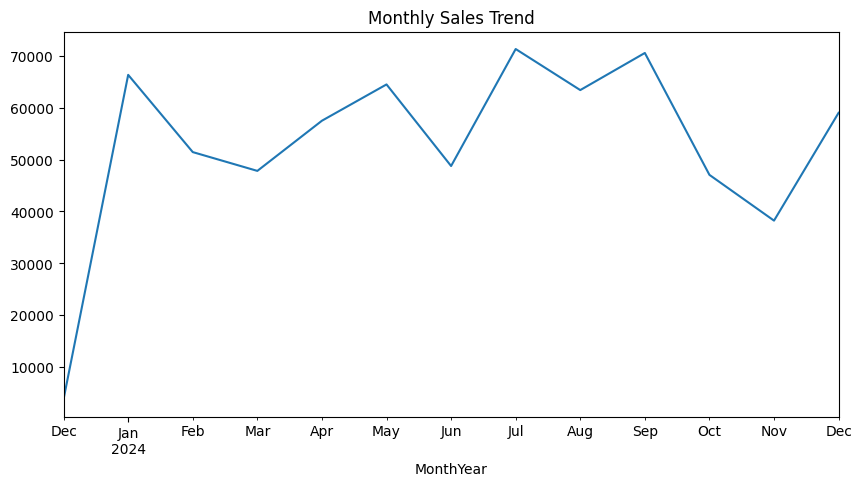

In [5]:
# Sales by region
region_sales = full_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', title='Total Sales by Region')
plt.show()

# Sales by product category
category_sales = full_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', title='Total Sales by Product Category')
plt.show()

# Monthly sales trend
full_data['TransactionDate'] = pd.to_datetime(full_data['TransactionDate'])
full_data['MonthYear'] = full_data['TransactionDate'].dt.to_period('M')
monthly_sales = full_data.groupby('MonthYear')['TotalValue'].sum()
monthly_sales.plot(title='Monthly Sales Trend', figsize=(10, 5))
plt.show()


Customer Spending Behavior

Top customers contribute 131829.22 out of 689995.56 in sales.


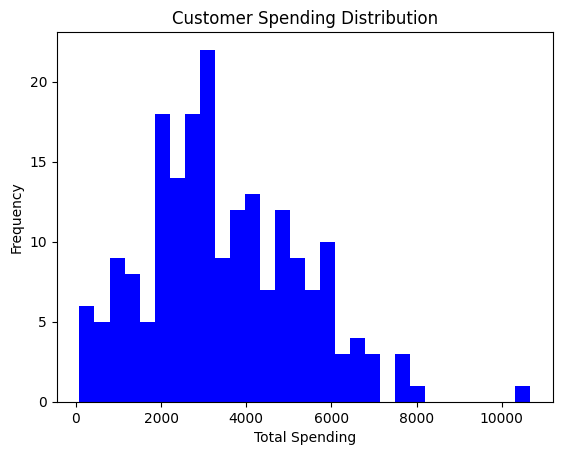

In [7]:
# Total spending by each customer
customer_sales = full_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)

# Identify high-value customers (e.g., top 10% customers by revenue)
top_customers = customer_sales.head(int(len(customer_sales) * 0.1))
print(f"Top customers contribute {top_customers.sum()} out of {customer_sales.sum()} in sales.")

# Visualization
customer_sales.plot(kind='hist', bins=30, title='Customer Spending Distribution', color='blue')
plt.xlabel('Total Spending')
plt.show()
